VINÍCIUS LAMAS VON SOHSTEN

TRABALHO MACHINE LEARNING II

SANTANDER CODERS #1006

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, re, joblib
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from scipy.stats import probplot
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score, RocCurveDisplay, confusion_matrix
from imblearn.over_sampling import SMOTE

## Exploração inicial do dataset

In [67]:
df = pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [68]:
df.shape

(100000, 28)

In [69]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [71]:
for _ in df.columns:
  print(f'{_}: {len(df[_].unique())}')

ID: 100000
Customer_ID: 12500
Month: 8
Name: 10140
Age: 1788
SSN: 12501
Occupation: 16
Annual_Income: 18940
Monthly_Inhand_Salary: 13236
Num_Bank_Accounts: 943
Num_Credit_Card: 1179
Interest_Rate: 1750
Num_of_Loan: 434
Type_of_Loan: 6261
Delay_from_due_date: 73
Num_of_Delayed_Payment: 750
Changed_Credit_Limit: 4384
Num_Credit_Inquiries: 1224
Credit_Mix: 4
Outstanding_Debt: 13178
Credit_Utilization_Ratio: 100000
Credit_History_Age: 405
Payment_of_Min_Amount: 3
Total_EMI_per_month: 14950
Amount_invested_monthly: 91050
Payment_Behaviour: 7
Monthly_Balance: 98793
Credit_Score: 3


In [72]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [73]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [74]:
df.describe(include='object')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


## Ajustando o dataframe

In [75]:
df = pd.read_csv('train.csv')
df = df.drop(columns = ['ID', 'Name', 'Customer_ID', 'SSN', 'Credit_Utilization_Ratio'])
# Retirando colunas únicas dos clientes

In [76]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [77]:
dict_month = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}
df['Month'] = df['Month'].apply(lambda x: dict_month[x])
df['Month']

0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 100000, dtype: int64

In [78]:
# Facilitando a visualização de valores únicos e possíveis problemas no df
for _ in df.columns:
  unique_recs = df[_].unique()
  print(f'\n{_}')
  if(len(unique_recs) < 30):
    print(unique_recs)
  else:
    print(unique_recs[:30])


Month
[1 2 3 4 5 6 7 8]

Age
['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33' '34_' '7580' '30'
 '30_' '24' '24_' '44' '45' '40' '41' '32' '33_' '35' '35_' '36' '39' '37'
 '181' '20' '46']

Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

Annual_Income
['19114.12' '34847.84' '34847.84_' '143162.64' '30689.89' '30689.89_'
 '35547.71_' '35547.71' '73928.46' '131313.4' '10909427.0' '34081.38_'
 '34081.38' '114838.41' '114838.41_' '31370.8' '33751.27' '88640.24'
 '88640.24_' '54392.16' '54392.16_' '8701.545' '8701.545_' '25546.26'
 '25546.26_' '31993.78' '92047.08' '92047.08_' '32284.62' '97791.42']

Monthly_Inhand_Salary
[ 1824.84333333            nan  3037.98666667 12187.22
  2612.49083333  2853.30916667  5988.705      11242.78333333
 10469.20775939  2611.115       9843.8675      2825.23333333
  2948.60583333  7266.68666667  4766.68  

In [79]:
# Ajustando os valores numéricos do df

df['Age'] = df['Age'].astype(str).str.replace('_', '').astype(int)
df['Age'] = df['Age'].apply(lambda x: int(df['Age'].median()) if x < 0 or x > 120 else x)

df['Annual_Income'] = df['Annual_Income'].astype(str).str.replace('_', '').astype(float)

df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '').astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())

df['Num_of_Loan'] = df['Num_of_Loan'].astype(str).str.replace('_', '').astype(int)

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str).str.replace('_', '').replace('nan', np.nan).astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(str).str.replace('_', '').replace('', np.nan).astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median())

df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median()).astype(int)

df['Credit_History_Age'] = df['Credit_History_Age'].str.replace('Years','')
df['Credit_History_Age'] = df['Credit_History_Age'].str.replace('and','.')
df['Credit_History_Age'] = df['Credit_History_Age'].str.replace('Months','')
df['Credit_History_Age'] = df['Credit_History_Age'].str.replace(' ','').astype(float)
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].median())
df['Credit_History_Age'] = df['Credit_History_Age']+((df['Credit_History_Age'] % 1)*10)/12-(df['Credit_History_Age'] % 1)

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_','').astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())

df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_','').astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].median())
df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x: (df['Monthly_Balance'].median()) if x < -10000000 or x > 10000000 else x)

In [80]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '').astype(float)

# df['Monthly_Balance'].min()
# df['Monthly_Balance'].sort_values(ascending=True)

In [81]:
# Ajustando os valores categóricos do df

df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('!@9#%8','Unknown')

df['Occupation'] = df['Occupation'].str.strip('_').replace('', 'Unknown')

df['Credit_Mix'] = df['Credit_Mix'].str.strip('_').replace('', 'Unknown')

In [82]:
df.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,33.31899,1.764157e+05,4029.084964,17.091280,22.47443,72.466040,3.009960,21.068780,29.738370,10.368345,27.326780,1426.220376,18.282330,1403.118217,614.951381,400.273856
std,2.291299,10.64554,1.429618e+06,2961.363540,117.404834,129.05741,466.422621,62.647879,14.860104,218.017612,6.719627,191.293766,1155.129026,7.931604,8306.041270,1999.726647,210.834851
min,1.000000,14.00000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,0.083333,0.000000,0.000000,0.007760
25%,2.750000,25.00000,1.945750e+04,1792.084167,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.420000,3.000000,566.072500,12.666667,30.306660,77.017414,271.839534
50%,4.500000,33.00000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,18.166667,69.249473,135.925682,336.449266
75%,6.250000,41.00000,7.279092e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.660000,9.000000,1945.962500,24.166667,161.224249,255.038698,463.502161
max,8.000000,118.00000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,33.666667,82331.000000,10000.000000,1602.040519


In [83]:
df.describe(include='object')

,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,88592,100000,100000,100000,100000
unique,16,6260,4,3,7,3
top,Unknown,Not Specified,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,7062,1408,36479,52326,25513,53174


In [84]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', 'Unknown',
       'High_spent_Large_value_payments'], dtype=object)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Month                    100000 non-null  int64  
 1   Age                      100000 non-null  int64  
 2   Occupation               100000 non-null  object 
 3   Annual_Income            100000 non-null  float64
 4   Monthly_Inhand_Salary    100000 non-null  float64
 5   Num_Bank_Accounts        100000 non-null  int64  
 6   Num_Credit_Card          100000 non-null  int64  
 7   Interest_Rate            100000 non-null  int64  
 8   Num_of_Loan              100000 non-null  int64  
 9   Type_of_Loan             88592 non-null   object 
 10  Delay_from_due_date      100000 non-null  int64  
 11  Num_of_Delayed_Payment   100000 non-null  int64  
 12  Changed_Credit_Limit     100000 non-null  float64
 13  Num_Credit_Inquiries     100000 non-null  int64  
 14  Credi

In [86]:
# Tratando a tão estranha coluna Type_of_Loan

df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Unknown')
separador = ', '
all_possible_types = separador.join(df['Type_of_Loan'].values)
all_possible_types = all_possible_types.replace('and ', '')
all_possible_types = all_possible_types.split(', ')
all_possible_types = list(set(all_possible_types))
all_possible_types
for possible_type in all_possible_types:
  df[f"loan_type_{possible_type.lower().replace(' ', '_')}"] = \
    df['Type_of_Loan'].apply(lambda x: 1 if possible_type in x else 0)
df = df.drop(columns = ['Type_of_Loan'])
for possible_type in all_possible_types:
  dummy_column_name = f"loan_type_{possible_type.lower().replace(' ', '_')}"
  print(f'\n{dummy_column_name}:')
  print(df[dummy_column_name].value_counts(1))



loan_type_home_equity_loan:
0    0.686
1    0.314
Name: loan_type_home_equity_loan, dtype: float64

loan_type_unknown:
0    0.88592
1    0.11408
Name: loan_type_unknown, dtype: float64

loan_type_credit-builder_loan:
0    0.68272
1    0.31728
Name: loan_type_credit-builder_loan, dtype: float64

loan_type_personal_loan:
0    0.68896
1    0.31104
Name: loan_type_personal_loan, dtype: float64

loan_type_payday_loan:
0    0.68056
1    0.31944
Name: loan_type_payday_loan, dtype: float64

loan_type_debt_consolidation_loan:
0    0.6896
1    0.3104
Name: loan_type_debt_consolidation_loan, dtype: float64

loan_type_student_loan:
0    0.6896
1    0.3104
Name: loan_type_student_loan, dtype: float64

loan_type_auto_loan:
0    0.6944
1    0.3056
Name: loan_type_auto_loan, dtype: float64

loan_type_not_specified:
0    0.6832
1    0.3168
Name: loan_type_not_specified, dtype: float64

loan_type_mortgage_loan:
0    0.6864
1    0.3136
Name: loan_type_mortgage_loan, dtype: float64


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Month                              100000 non-null  int64  
 1   Age                                100000 non-null  int64  
 2   Occupation                         100000 non-null  object 
 3   Annual_Income                      100000 non-null  float64
 4   Monthly_Inhand_Salary              100000 non-null  float64
 5   Num_Bank_Accounts                  100000 non-null  int64  
 6   Num_Credit_Card                    100000 non-null  int64  
 7   Interest_Rate                      100000 non-null  int64  
 8   Num_of_Loan                        100000 non-null  int64  
 9   Delay_from_due_date                100000 non-null  int64  
 10  Num_of_Delayed_Payment             100000 non-null  int64  
 11  Changed_Credit_Limit               10000

In [88]:
df.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,loan_type_home_equity_loan,loan_type_unknown,loan_type_credit-builder_loan,loan_type_personal_loan,loan_type_payday_loan,loan_type_debt_consolidation_loan,loan_type_student_loan,loan_type_auto_loan,loan_type_not_specified,loan_type_mortgage_loan
count,100000.000000,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000
mean,4.500000,33.31899,1.764157e+05,4029.084964,17.091280,22.47443,72.466040,3.009960,21.068780,29.738370,...,0.314000,0.11408,0.31728,0.311040,0.319440,0.31040,0.31040,0.305600,0.316800,0.313600
std,2.291299,10.64554,1.429618e+06,2961.363540,117.404834,129.05741,466.422621,62.647879,14.860104,218.017612,...,0.464119,0.31791,0.46542,0.462921,0.466262,0.46266,0.46266,0.460663,0.465231,0.463958
min,1.000000,14.00000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,2.750000,25.00000,1.945750e+04,1792.084167,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
50%,4.500000,33.00000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
75%,6.250000,41.00000,7.279092e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,...,1.000000,0.00000,1.00000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000
max,8.000000,118.00000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,...,1.000000,1.00000,1.00000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000


## Treinando o modelo


In [101]:
# Uma amostra menor foi escolhida para agilidade dos testes
df_sample = df.sample(frac=0.01)
df_sample['Age'].count()

1000

In [90]:
#sns.pairplot(df_sample,hue='Credit_Score')

In [91]:
def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):

    print("\nMétricas de avaliação de treino:")
    y_pred_train = estimator.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train)
    ConfusionMatrixDisplay(cm_train).plot(cmap='viridis')
    plt.show()
    print(classification_report(y_train, y_pred_train))
    #RocCurveDisplay.from_estimator(estimator, X_train, y_train)

    print("\nMétricas de avaliação de teste:")
    y_pred_test = estimator.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(cm_test).plot(cmap='viridis')
    plt.show()
    print(classification_report(y_test, y_pred_test))
    #RocCurveDisplay.from_estimator(estimator, X_test, y_test)


    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print("Train Accuracy",estimator,':', train_acc)
    print("Test Accuracy",estimator,':', test_acc)


Métricas de avaliação de treino:


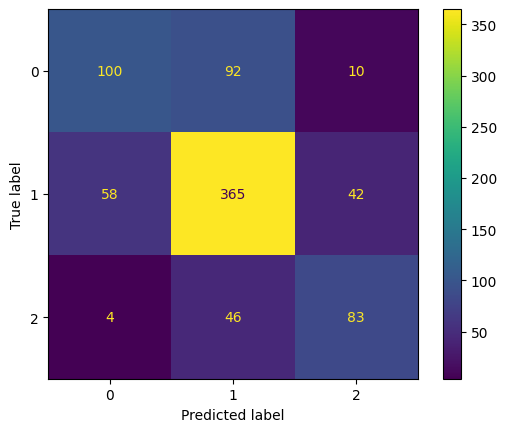

              precision    recall  f1-score   support

           0       0.62      0.50      0.55       202
           1       0.73      0.78      0.75       465
           2       0.61      0.62      0.62       133

    accuracy                           0.69       800
   macro avg       0.65      0.63      0.64       800
weighted avg       0.68      0.69      0.68       800


Métricas de avaliação de teste:


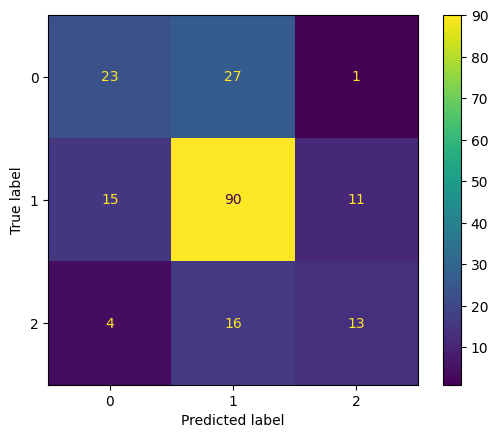

              precision    recall  f1-score   support

           0       0.55      0.45      0.49        51
           1       0.68      0.78      0.72       116
           2       0.52      0.39      0.45        33

    accuracy                           0.63       200
   macro avg       0.58      0.54      0.56       200
weighted avg       0.62      0.63      0.62       200

Train Accuracy SVC(kernel='linear', random_state=42) : 0.685
Test Accuracy SVC(kernel='linear', random_state=42) : 0.63


In [92]:
df_sample['Credit_Score'] = [1 if _ == 'Standard' else (2 if _ == 'Good' else 0) for _ in df_sample['Credit_Score'].values]

X = df_sample.drop(columns='Credit_Score')
y = df_sample['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

features_num = X_train.select_dtypes(include=np.number).columns.tolist()
num_imputer = SimpleImputer(strategy="mean")
X_train[features_num] = num_imputer.fit_transform(X_train[features_num])
scaler = StandardScaler()
X_train[features_num] = scaler.fit_transform(X_train[features_num])

features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()
cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
X_train[features_cat] = cat_imputer.fit_transform(X_train[features_cat])
encoder = OneHotEncoder()

X_train_cat_encoded = encoder.fit_transform(X_train[features_cat])
X_train_preprocessed = np.hstack((X_train[features_num], X_train_cat_encoded.toarray()))

X_test[features_num] = num_imputer.transform(X_test[features_num])
X_test[features_num] = scaler.transform(X_test[features_num])
X_test[features_cat] = cat_imputer.transform(X_test[features_cat])
X_test_cat_encoded = encoder.transform(X_test[features_cat])

X_test_preprocessed = np.hstack((X_test[features_num], X_test_cat_encoded.toarray()))

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_preprocessed, y_train)

metricas_classificacao(svm_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)



Métricas de avaliação de treino:


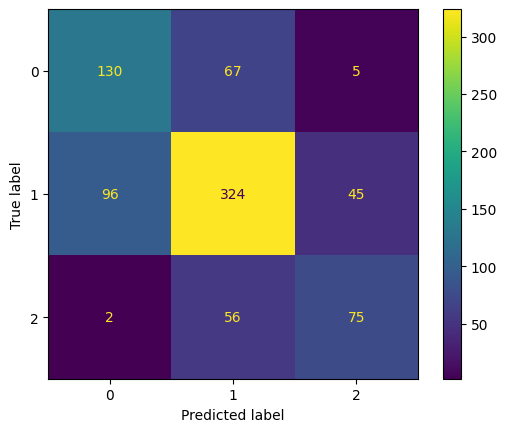

              precision    recall  f1-score   support

           0       0.57      0.64      0.60       202
           1       0.72      0.70      0.71       465
           2       0.60      0.56      0.58       133

    accuracy                           0.66       800
   macro avg       0.63      0.63      0.63       800
weighted avg       0.67      0.66      0.66       800


Métricas de avaliação de teste:


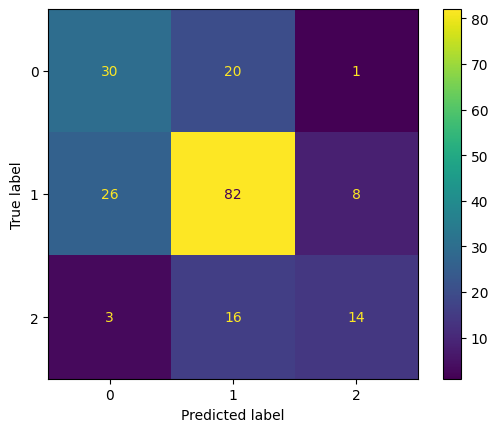

              precision    recall  f1-score   support

           0       0.51      0.59      0.55        51
           1       0.69      0.71      0.70       116
           2       0.61      0.42      0.50        33

    accuracy                           0.63       200
   macro avg       0.60      0.57      0.58       200
weighted avg       0.63      0.63      0.63       200

Train Accuracy AdaBoostClassifier() : 0.66125
Test Accuracy AdaBoostClassifier() : 0.63


In [93]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_preprocessed, y_train)

metricas_classificacao(adaboost_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)


Métricas de avaliação de treino:


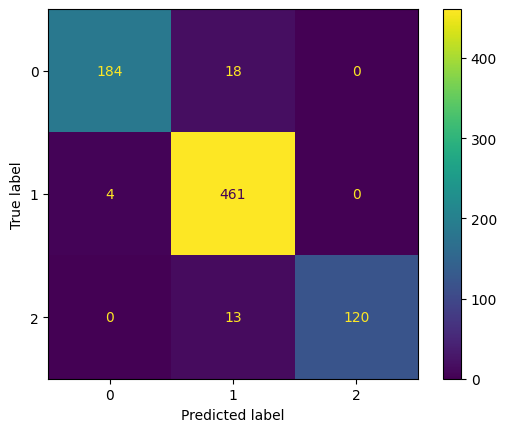

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       202
           1       0.94      0.99      0.96       465
           2       1.00      0.90      0.95       133

    accuracy                           0.96       800
   macro avg       0.97      0.93      0.95       800
weighted avg       0.96      0.96      0.96       800


Métricas de avaliação de teste:


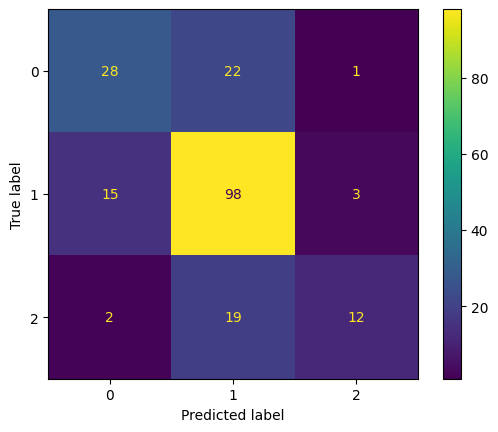

              precision    recall  f1-score   support

           0       0.62      0.55      0.58        51
           1       0.71      0.84      0.77       116
           2       0.75      0.36      0.49        33

    accuracy                           0.69       200
   macro avg       0.69      0.59      0.61       200
weighted avg       0.69      0.69      0.68       200

Train Accuracy GradientBoostingClassifier() : 0.95625
Test Accuracy GradientBoostingClassifier() : 0.69


In [94]:
gradboosting_model = GradientBoostingClassifier()
gradboosting_model.fit(X_train_preprocessed, y_train)

metricas_classificacao(gradboosting_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)


Métricas de avaliação de treino:


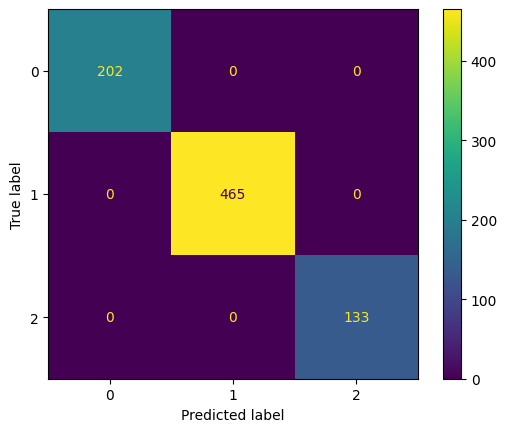

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       465
           2       1.00      1.00      1.00       133

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Métricas de avaliação de teste:


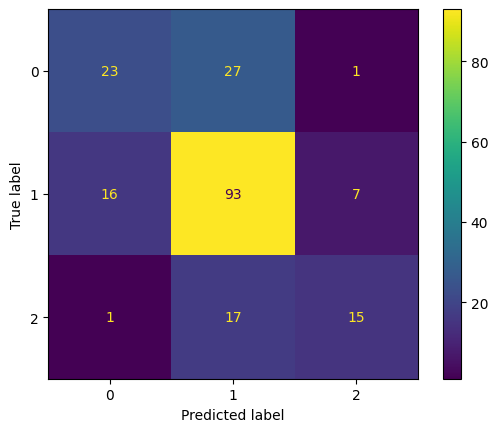

              precision    recall  f1-score   support

           0       0.57      0.45      0.51        51
           1       0.68      0.80      0.74       116
           2       0.65      0.45      0.54        33

    accuracy                           0.66       200
   macro avg       0.64      0.57      0.59       200
weighted avg       0.65      0.66      0.64       200

Train Accuracy XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, mo

In [95]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_preprocessed, y_train)

metricas_classificacao(xgb_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

Observando que o XGBoost GradientBoosting aparentam ser os melhores modelos, mas notando que estarem 'overfitados', eles foram escolhidos para realizar um teste de variação de parâmetros realizando o gridsearch.

In [126]:
xgb_model = XGBClassifier()

param_grid = {
    #learning_rate': [0.01, 0.1, 0.2,0.4],
    'n_estimators': [25,50, 100],#, 200],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.8, 0.9, 1.0]
    #'reg_alpha': [0.5, 1.0,4,8],
    #'reg_lambda': [0.5, 1.0,4,8]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)

grid_search.fit(X_train_preprocessed, y_train)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

print("Melhor desempenho: {:.2f}%".format(grid_search.best_score_ * 100))


Melhores parâmetros encontrados:
{'colsample_bytree': 0.9, 'max_depth': 3, 'n_estimators': 25}
Melhor desempenho: 62.50%



Métricas de avaliação de treino:


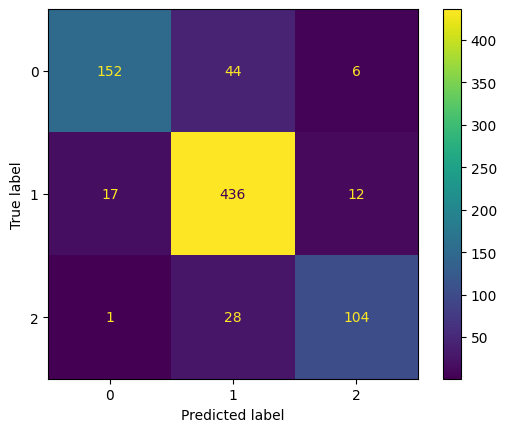

              precision    recall  f1-score   support

           0       0.89      0.75      0.82       202
           1       0.86      0.94      0.90       465
           2       0.85      0.78      0.82       133

    accuracy                           0.86       800
   macro avg       0.87      0.82      0.84       800
weighted avg       0.87      0.86      0.86       800


Métricas de avaliação de teste:


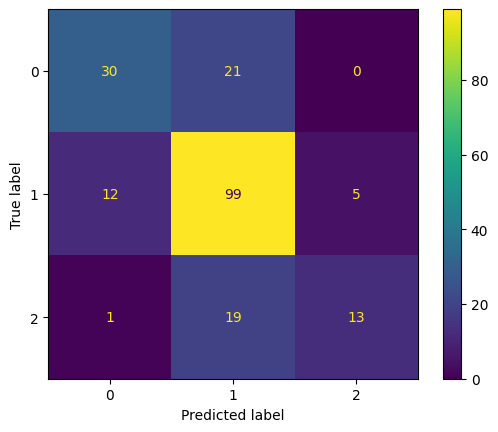

              precision    recall  f1-score   support

           0       0.70      0.59      0.64        51
           1       0.71      0.85      0.78       116
           2       0.72      0.39      0.51        33

    accuracy                           0.71       200
   macro avg       0.71      0.61      0.64       200
weighted avg       0.71      0.71      0.70       200

Train Accuracy XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monoto

In [127]:
metricas_classificacao(grid_search.best_estimator_, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

In [122]:
gradboosting_model = GradientBoostingClassifier()

param_grid = {
    'learning_rate': [0.2,0.4,0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 5],
    #'criterion': ['friedman_mse',  'mae']
}

grid_search = GridSearchCV(estimator=gradboosting_model, param_grid=param_grid, scoring='accuracy', cv=3)

grid_search.fit(X_train_preprocessed, y_train)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

print("Melhor desempenho: {:.2f}%".format(grid_search.best_score_ * 100))


Melhores parâmetros encontrados:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Melhor desempenho: 61.13%



Métricas de avaliação de treino:


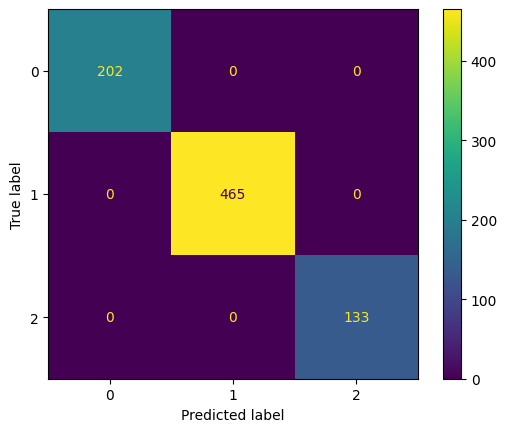

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       465
           2       1.00      1.00      1.00       133

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Métricas de avaliação de teste:


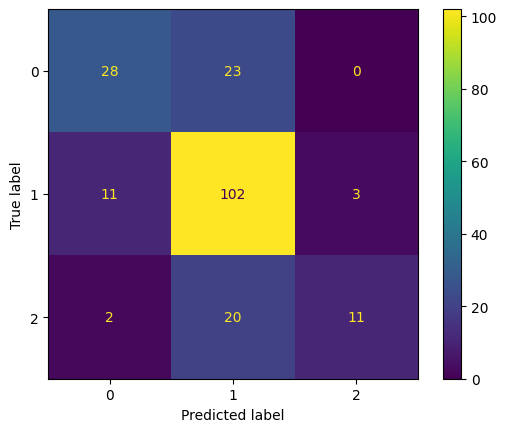

              precision    recall  f1-score   support

           0       0.68      0.55      0.61        51
           1       0.70      0.88      0.78       116
           2       0.79      0.33      0.47        33

    accuracy                           0.70       200
   macro avg       0.72      0.59      0.62       200
weighted avg       0.71      0.70      0.69       200

Train Accuracy GradientBoostingClassifier(learning_rate=0.2, n_estimators=200) : 1.0
Test Accuracy GradientBoostingClassifier(learning_rate=0.2, n_estimators=200) : 0.705


In [123]:
metricas_classificacao(grid_search.best_estimator_, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

Não foi possível obter uma melhora substâncial utilizando o gridsearch, provavelmente algum trabalho mais detalhado deva ser feito em cima das features para obter um melhor resultado do modelo.

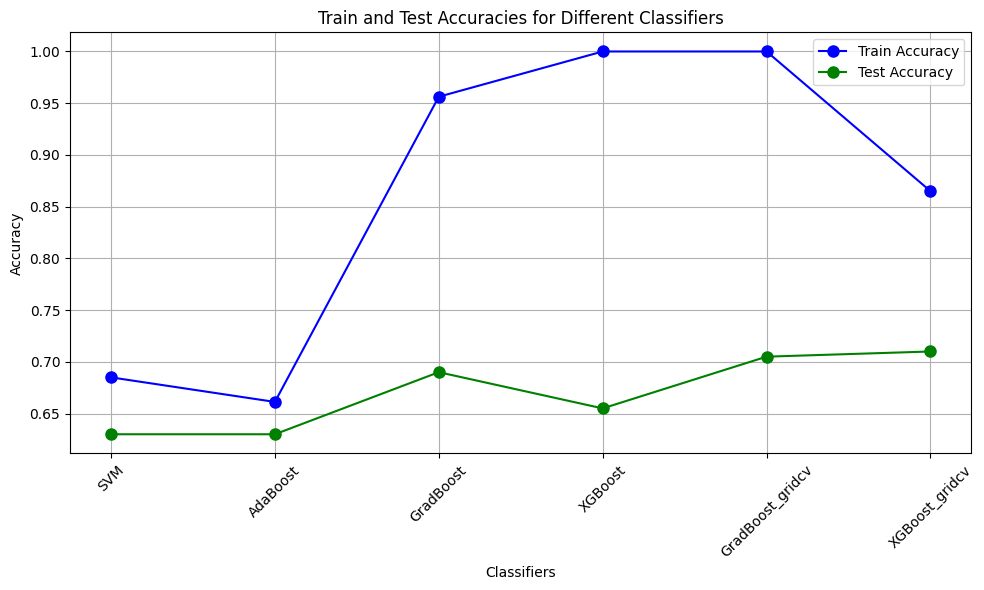

In [128]:
classifiers = ['SVM', 'AdaBoost', 'GradBoost', 'XGBoost', 'GradBoost_gridcv', 'XGBoost_gridcv']
train_accuracies = [0.685, 0.66125, 0.95625, 1.0, 1.0, 0.865]
test_accuracies = [0.63, 0.63, 0.69, 0.655, 0.705, 0.71]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(classifiers, train_accuracies, marker='o', label='Train Accuracy', linestyle='-', color='b', markersize=8)
plt.plot(classifiers, test_accuracies, marker='o', label='Test Accuracy', linestyle='-', color='g', markersize=8)

# Add labels and legend
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies for Different Classifiers')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()